In [22]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\data.csv")
df

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ


****
## Feature Descriptions ## 
****

Available in Dataset Description

1. **Age:** A continuous variable representing the age of the individual.

2. **Gender:** A categorical variable indicating the gender of the individual. Possible values are 'Male' and 'Female'.

3. **Education:** A binary variable, A value of 1 indicates the individual has at least a graduate-level education (or higher), and 0 indicates an undergraduate, high school level or Uneducated.

4. **Interest:** A categorical variable representing the individual's primary area of interest.

5. **Introversion Score:** A continuous variable ranging from 0 to 10, representing the individual's tendency toward introversion versus extraversion. Higher scores indicate a greater tendency toward extraversion.

6. **Sensing Score:** A continuous variable ranging from 0 to 10, representing the individual's preference for sensing versus intuition. Higher scores indicate a preference for sensing.

7. **Thinking Score:** A continuous variable ranging from 0 to 10, indicating the individual's preference for thinking versus feeling. Higher scores indicate a preference for thinking.

8. **Judging Score:** A continuous variable ranging from 0 to 10, representing the individual's preference for judging versus perceiving. Higher scores indicate a preference for judging.

9. **Personality:** Target that contains People Personality Type

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


****
## Data Visualization ##
****

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

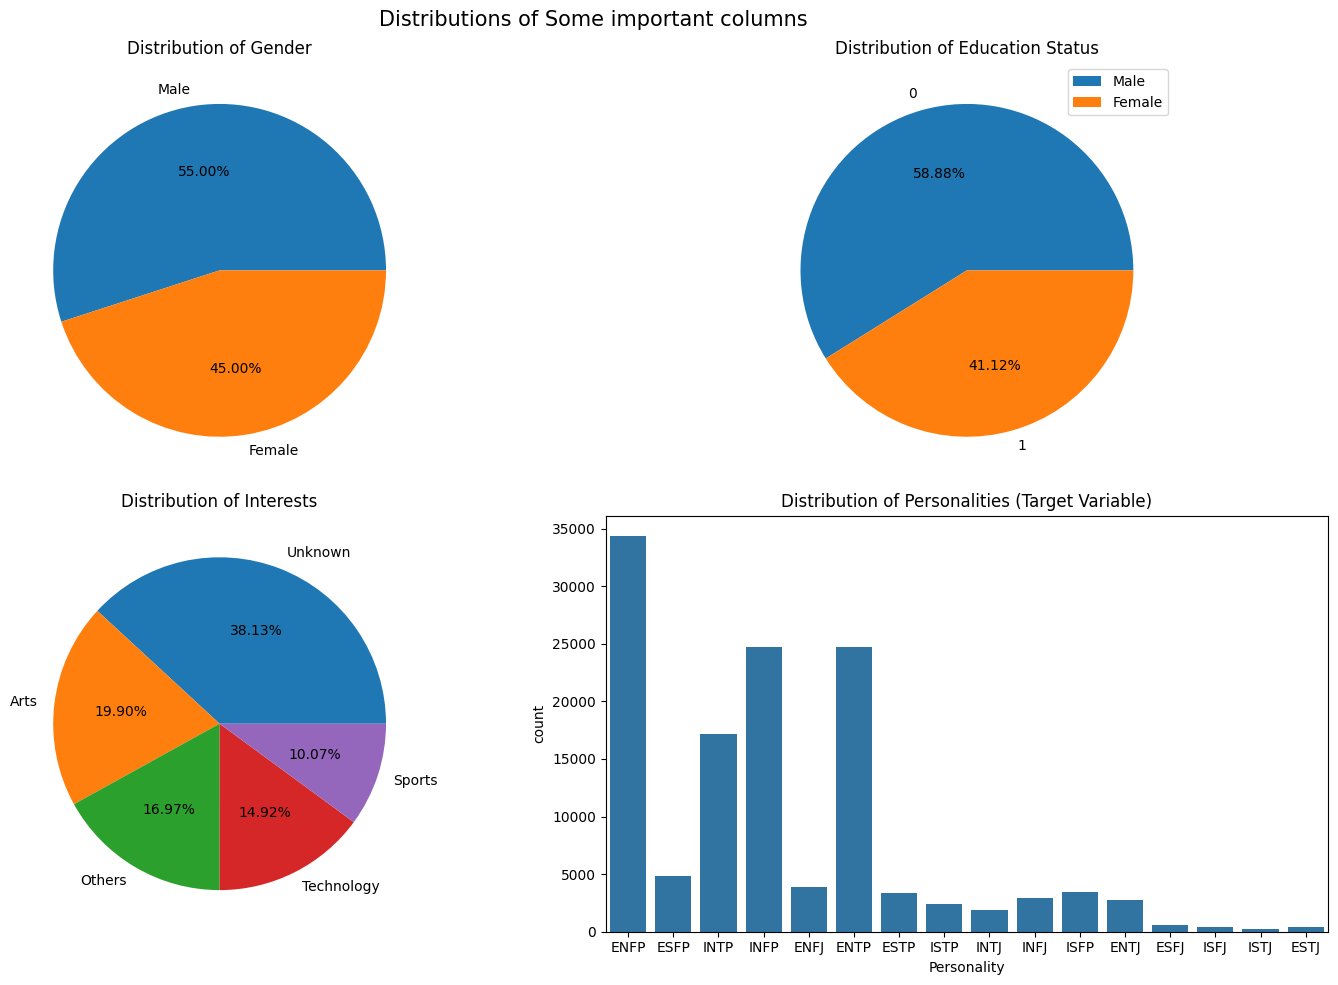

In [26]:
tdf=df['Gender'].value_counts().reset_index()
tdf1=df['Education'].value_counts().reset_index()
tdf2=df['Interest'].value_counts().reset_index()
tdf3=df['Personality'].value_counts().reset_index()
fig,ax=plt.subplots(2,2,figsize=(15,10))
ax[0][0].pie(x=tdf['count'],labels=tdf['Gender'],autopct='%.2f%%')
ax[0][0].set_title('Distribution of Gender')
ax[0][1].pie(x=tdf1['count'],labels=tdf1['Education'],autopct='%.2f%%')
ax[0][1].legend(['Male','Female'])
ax[0][1].set_title('Distribution of Education Status')
ax[1][0].pie(x=tdf2['count'],labels=tdf2['Interest'],autopct='%.2f%%')
ax[1][0].set_title('Distribution of Interests')
sns.countplot(data=df,x='Personality')
ax[1][1].set_title('Distribution of Personalities (Target Variable)')
plt.suptitle('Distributions of Some important columns',fontsize=15)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

1. Gender and Education are balanced
2. Around 38% of the people in this dataset either do not know their interests or are not ready to share :(
3. There are 16 different personality types with ENFP leading with around 35000 counts followed by ENTP type with around 25000 counts or people

C:\Users\Samanyu K\AppData\Local\Temp\ipykernel_19692\4075245981.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cate, y=props, palette='magma')


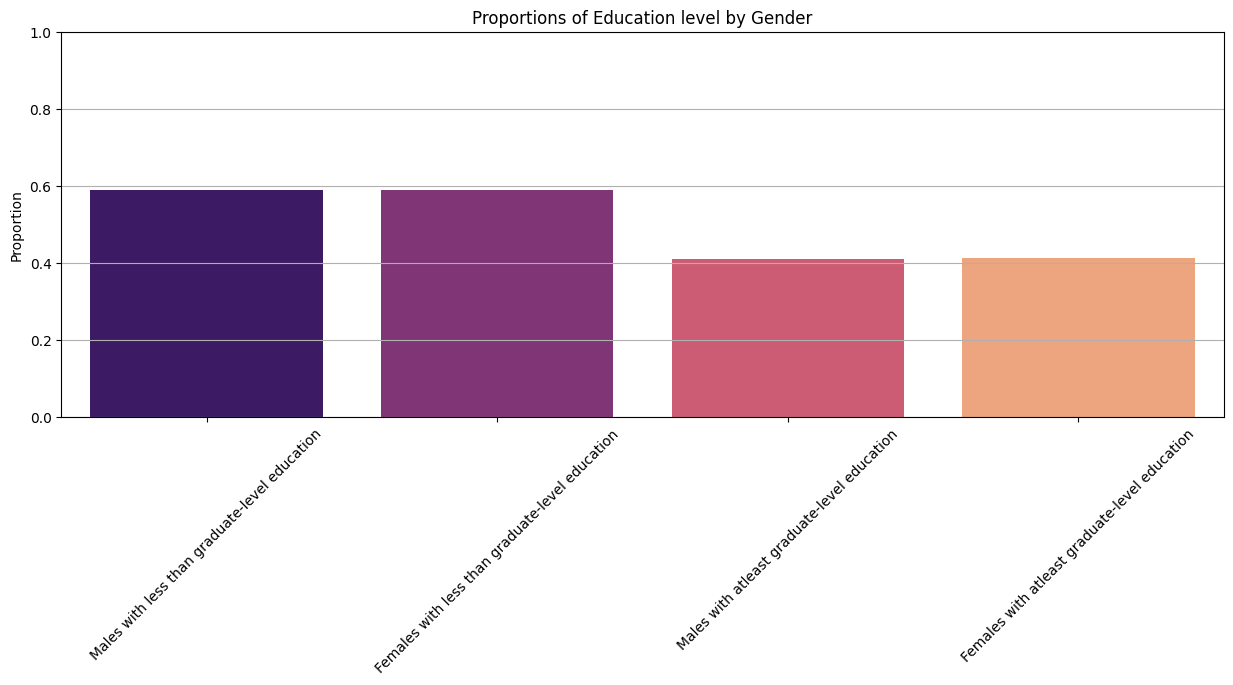

In [27]:
c=df.loc[(df['Education']==0)&(df['Gender']=='Male')].shape[0]
c1=df.loc[(df['Education']==0)&(df['Gender']=='Female')].shape[0]
c2=df.loc[(df['Education']==1)&(df['Gender']=='Male')].shape[0]
c3=df.loc[(df['Education']==1)&(df['Gender']=='Female')].shape[0]
total_counts=df['Gender'].value_counts()
props=[
     c/total_counts['Male'],  
    c1/total_counts['Female'],  
    c2/total_counts['Male'],  
    c3/total_counts['Female']   
]
cate=[
    'Males with less than graduate-level education',
    'Females with less than graduate-level education',
    'Males with atleast graduate-level education',
    'Females with atleast graduate-level education'
]
plt.figure(figsize=(15, 5))
sns.barplot(x=cate, y=props, palette='magma')
plt.title('Proportions of Education level by Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

**Findings:**
1. Males and females with less than graduate-level education make up the largest proportions.
2. There is a slightly higher proportion of males with a graduate-level education compared to females, but the difference is not drastic.
3. The proportions of individuals with at least a graduate-level education (both males and females) are lower compared to those with less than graduate-level education.

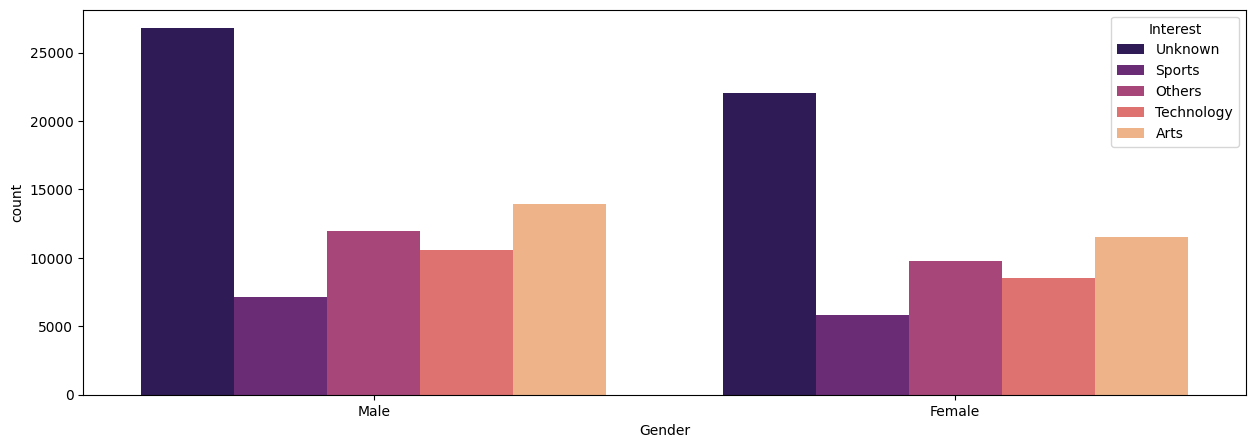

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Gender',hue='Interest',palette='magma')
plt.show()

**Findings:**
1. Both Males and Females show the same pattern in interests with varying numbers (Understandable as Males are more in this dataset)
2. Both have them do not really like to share their interests which can be visualized in the above graph :(
3. Males and Females show inclination towards Arts, which is the leading Interest
4. Males as well as Females have interest in other spcaes other than just Arts,Sports and Technology
5. Both the genders are more inclined towards technology than sports

**Let us look at how different Scores affect Personality type**

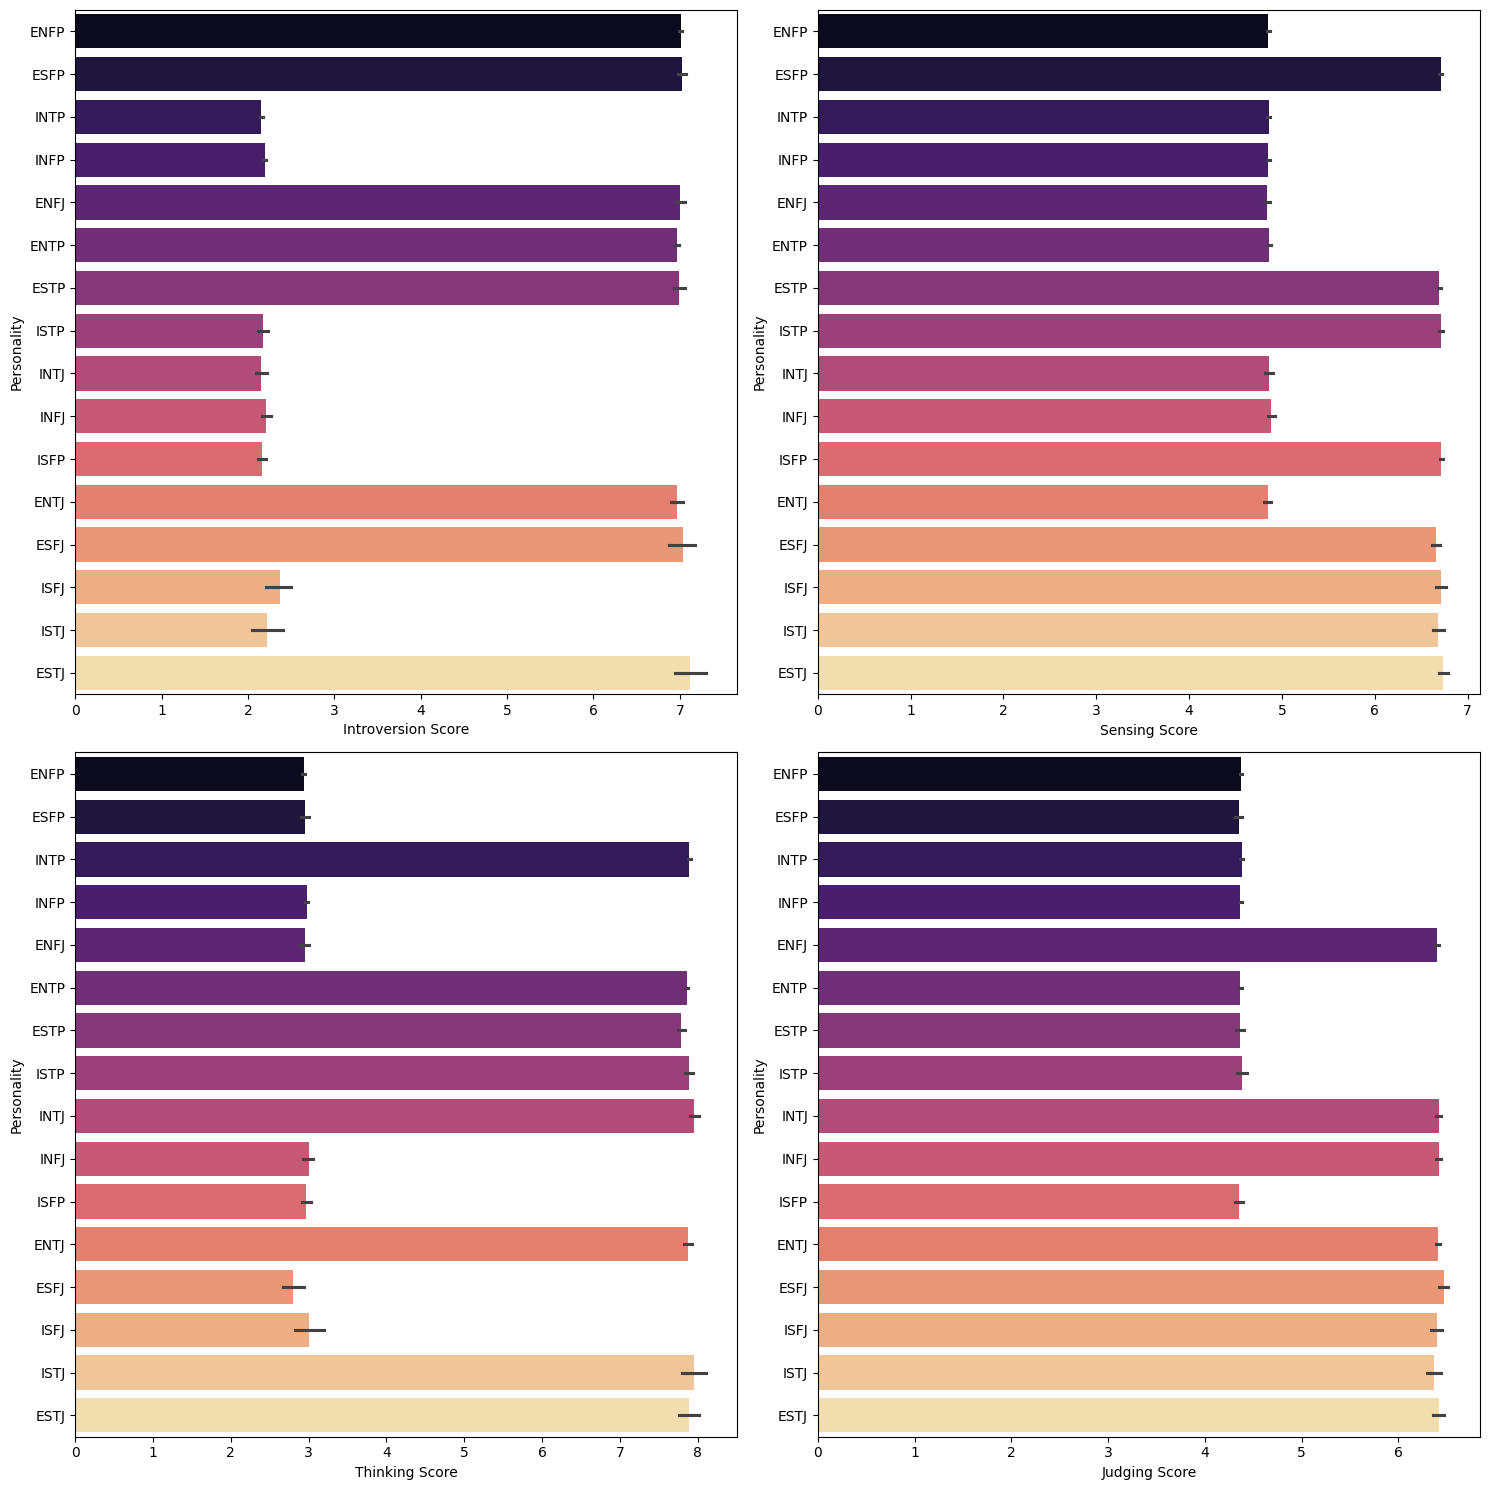

In [29]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.barplot(data=df, y='Personality', x='Introversion Score', palette='magma', estimator='mean',ax=ax[0][0],hue='Personality')
sns.barplot(data=df, y='Personality', x='Sensing Score', palette='magma', estimator='mean',ax=ax[0][1],hue='Personality')
sns.barplot(data=df, y='Personality', x='Thinking Score', palette='magma', estimator='mean',ax=ax[1][0],hue='Personality')
sns.barplot(data=df, y='Personality', x='Judging Score', palette='magma', estimator='mean',ax=ax[1][1],hue='Personality')
plt.tight_layout()
plt.show()

**Findings:**

**Introversion Score Analysis:**

1. INTJ and INTP types have the highest introversion scores, indicating that these personality types tend to be more introverted.
2. ENFJ and ENTP types have lower introversion scores, aligning with their extroverted traits.
3. Overall, types with an "I" (introversion) as the first letter tend to score higher in introversion, whereas those with an "E" (extroversion) score lower.

**Sensing Score Analysis:**

1. ESTJ and ISTJ types have the highest sensing scores, which suggests they are more likely to rely on concrete, sensory information.
2. Personality types with "N" (intuition) as their second letter, such as INTJ, ENTP, and INFJ, have lower sensing scores, indicating a preference for intuition over sensing.

**Correlation Between Introversion and Sensing Scores:**

1. Extroverted sensing types like ESTP and ESFP show high sensing scores but lower introversion, demonstrating the connection between extroversion and sensory processing.
2. Conversely, introverted intuitive types like INFJ and INTJ tend to have lower sensing scores but higher introversion scores.

**Patterns Across Personality Types:**

1. Sensing types (e.g., ESTJ, ISTJ, ESFJ) generally display lower introversion scores and higher sensing scores, as sensing is typically associated with a more hands-on, practical approach, often aligned with extroversion or a balanced personality.
2. Intuitive types, particularly those who are introverted (e.g., INTJ, INFJ), seem to prefer internal thinking processes and abstract thinking over sensory data.

**Thinking Score:**

1. INTP, ENTJ, and INTJ have the highest thinking scores, showing a strong preference for logical decision-making.
2. ESFJ, ISFJ, and INFJ have lower thinking scores, indicating a tendency towards feeling-based or emotional-based decision-making.

**Judging Score:**

1. ESTJ and ISTJ have the highest judging scores, highlighting their preference for structure and planning.
2. Perceiving types like ENFP and ESFP score lower, showing a preference for flexibility and spontaneity.

**Let us see how education and Gender affects Personality**

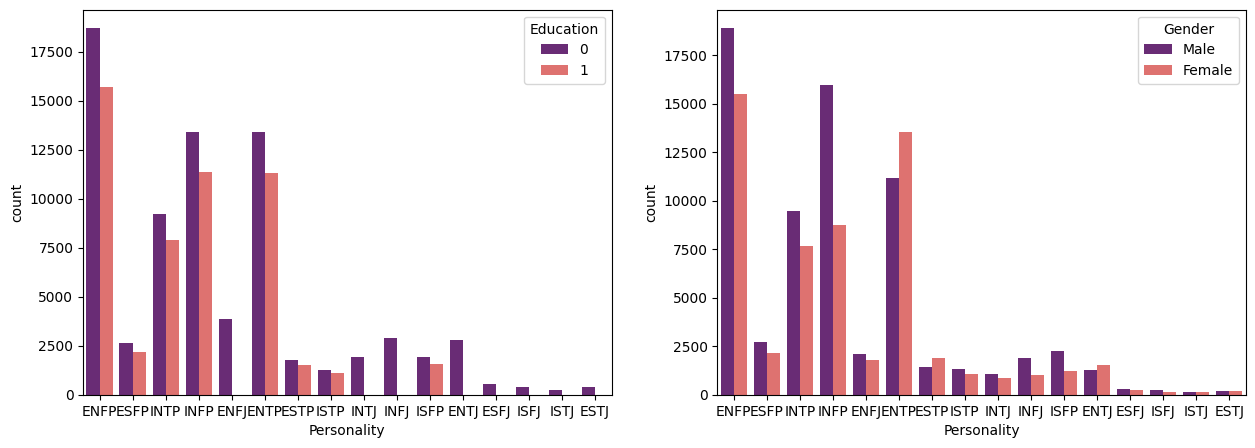

In [30]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df,x='Personality',hue='Education',palette='magma',ax=ax[0])
sns.countplot(data=df,x='Personality',hue='Gender',palette='magma',ax=ax[1])
plt.show()

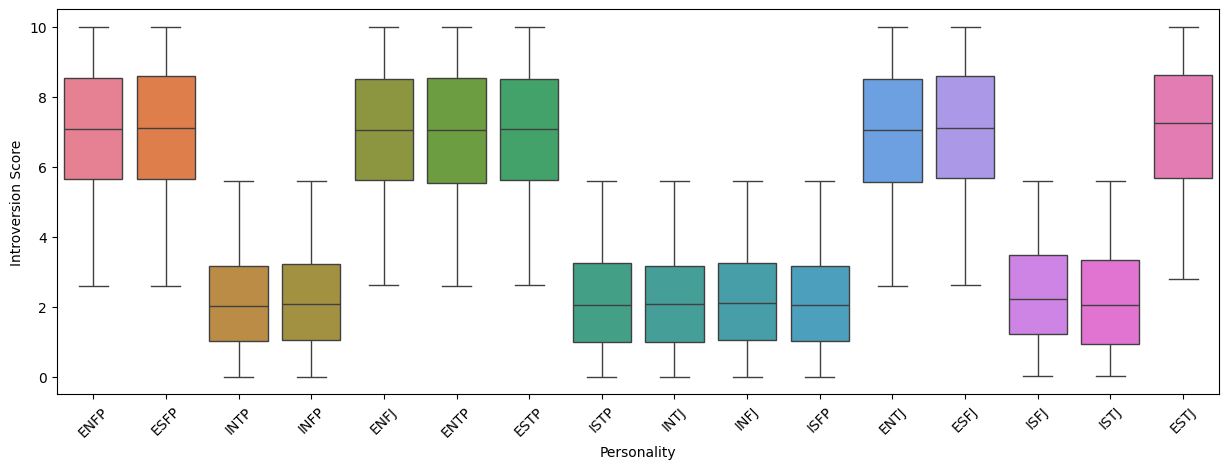

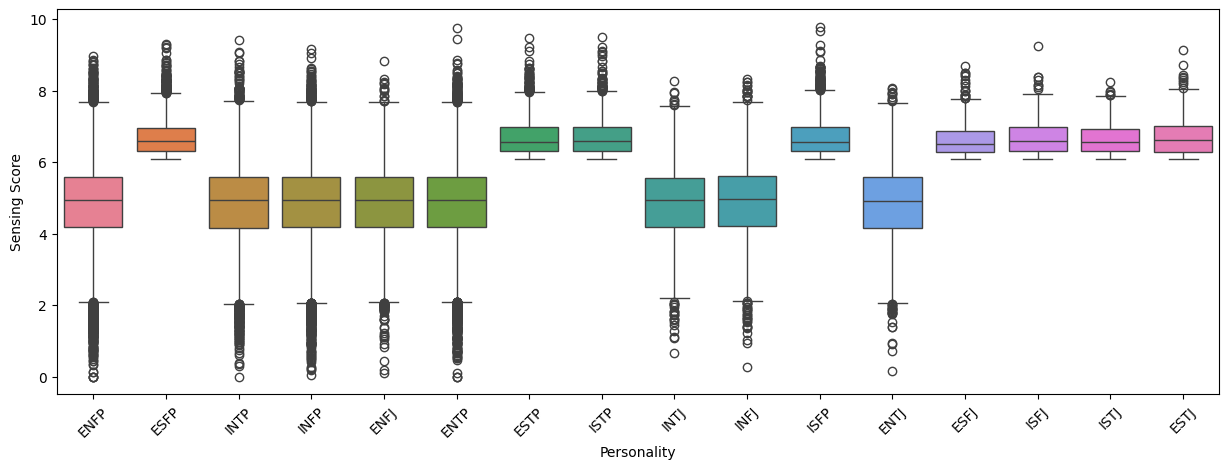

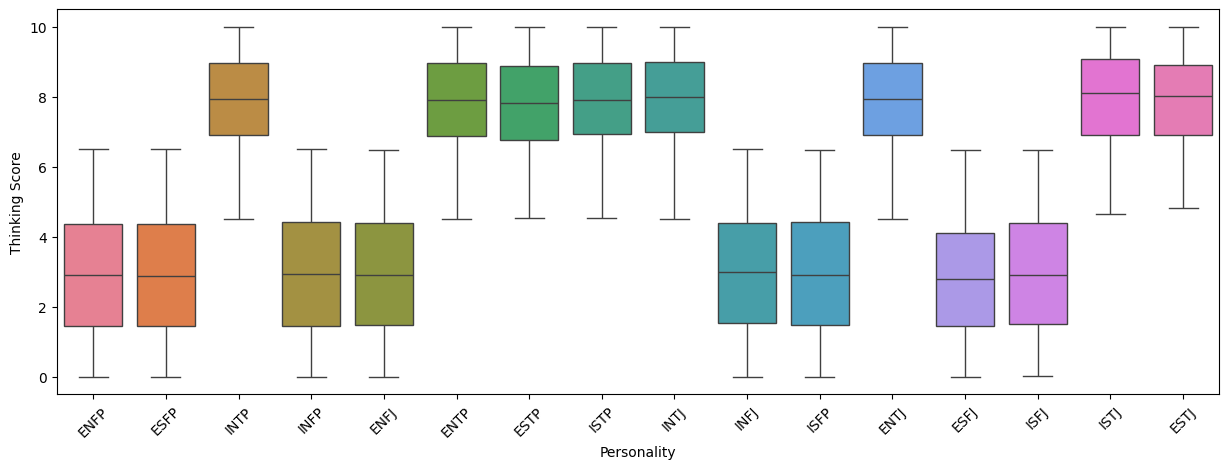

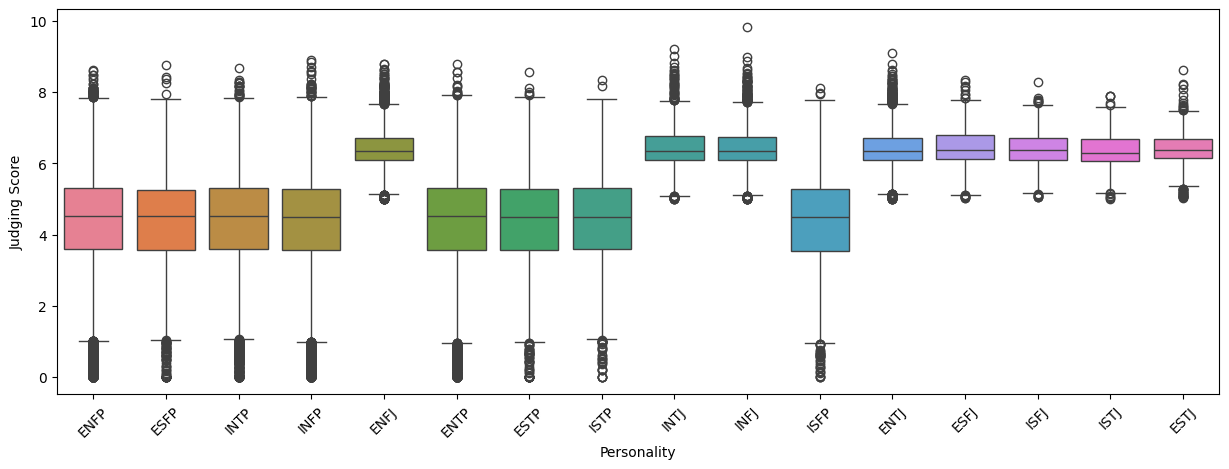

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Personality', y='Introversion Score', data=df, hue='Personality')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(x='Personality', y='Sensing Score', data=df, hue='Personality')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(x='Personality', y='Thinking Score', data=df, hue='Personality')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(x='Personality', y='Judging Score', data=df, hue='Personality')
plt.xticks(rotation=45)
plt.show()

****
## Data Preprocessing ##
****

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [33]:
df.isnull().any()   # No null values :)

Age                   False
Gender                False
Education             False
Introversion Score    False
Sensing Score         False
Thinking Score        False
Judging Score         False
Interest              False
Personality           False
dtype: bool

In [34]:
#We have some categorical values, encoding them using Label encoder.
#Not using One Hot encoding as i will be using ensemble models
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  int32  
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  int32  
 8   Personality         128061 non-null  int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 7.3 MB
None


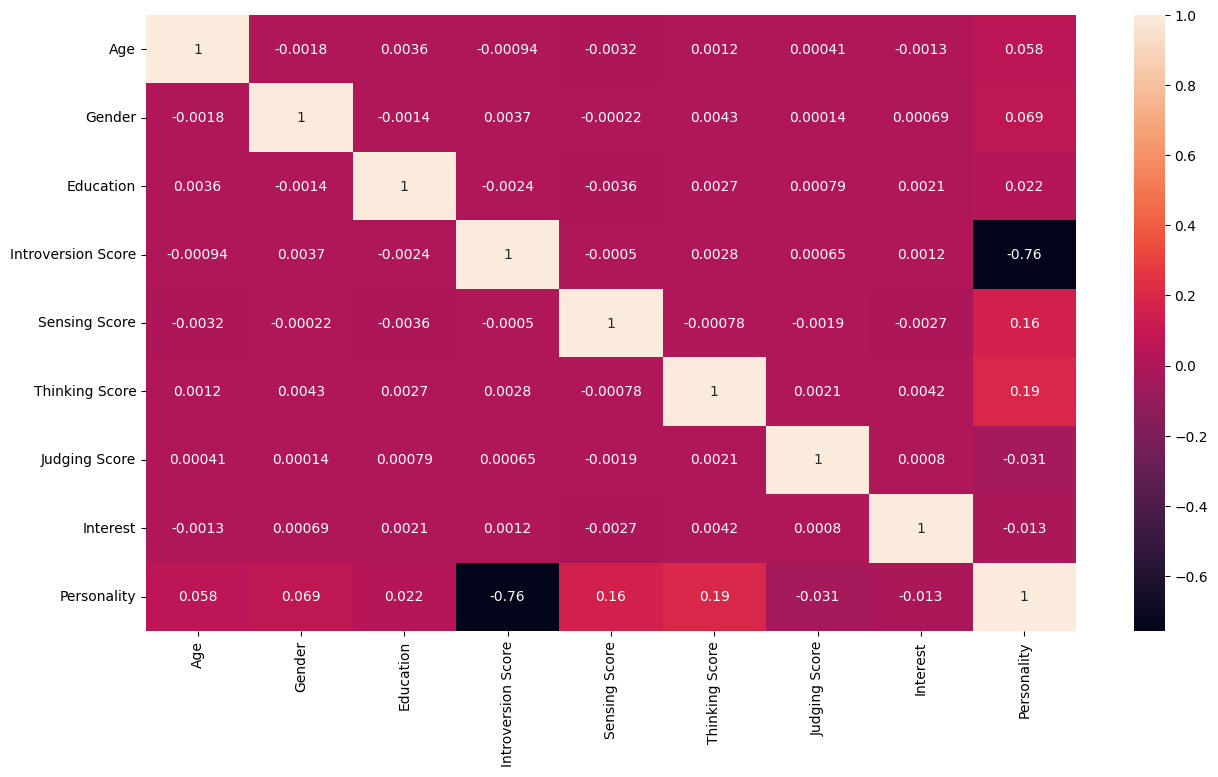

In [35]:
# Let us look at how the categories are related to each other using a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [36]:
#Let us examine the mutual information between the variables and the target variable to better understand the relationships and dependencies among them.
x=df.drop(columns='Personality')
y=df['Personality']
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

              Feature  Mutual Information
0      Thinking Score            0.578137
1  Introversion Score            0.523100
2       Sensing Score            0.242952
3       Judging Score            0.171518
4           Education            0.061715
5                 Age            0.040779
6            Interest            0.015277
7              Gender            0.012660


In [37]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

****
## Ensemble Models ##
****

In [38]:
#importing
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix

In [39]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'n_estimators':[150]}
nrf=RandomizedSearchCV(rf,param_distributions=params,n_jobs=-1,cv=10,scoring='accuracy',n_iter=2)
nrf.fit(x_t,y_t)
print(nrf.best_score_)
print(nrf.best_params_)
nrf=nrf.best_estimator_
pred_t=nrf.predict(x_t)
pred=nrf.predict(x_te)

0.9022229252907593
{'n_estimators': 150, 'criterion': 'gini'}


In [40]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [150],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_
pred1_t=nada.predict(x_t)
pred1=nada.predict(x_te)

{'n_estimators': 150, 'learning_rate': 1.11}
0.7946167428502916


In [44]:
print('Classification Report for Random Forest Classifier\n\n')
print(classification_report(y_te,pred),'\n\n\n')
print('Classification Report for AdaBoost Classifier\n\n')
print(classification_report(y_te,pred1))

Classification Report for Random Forest Classifier


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       982
           1       0.93      0.93      0.93      8535
           2       0.93      0.90      0.92       717
           3       0.92      0.93      0.92      6168
           4       0.77      0.71      0.74       157
           5       0.85      0.83      0.84      1162
           6       0.86      0.70      0.77       100
           7       0.85      0.82      0.83       845
           8       0.91      0.87      0.89       697
           9       0.90      0.91      0.90      6103
          10       0.89      0.88      0.88       480
          11       0.89      0.89      0.89      4439
          12       0.76      0.62      0.68       109
          13       0.81      0.83      0.82       856
          14       0.75      0.66      0.70        61
          15       0.80      0.82      0.81       605

    accuracy               

In [41]:
tdf=pd.DataFrame({'Classification Models':['Random Forest Classifier','AdaBoost Classifier'],
                  'Training Accuracy':[accuracy_score(y_t,pred_t),accuracy_score(y_t,pred1_t)],
                  'Training Precision':[precision_score(y_t,pred_t,average='macro'),precision_score(y_t,pred1_t,average='macro')],
                  'Training Recall':[recall_score(y_t,pred_t,average='macro'),recall_score(y_t,pred1_t,average='macro')],
                  'Training F1 score':[f1_score(y_t,pred_t,average='macro'),f1_score(y_t,pred1_t,average='macro')]})
tdf               

,Classification Models,Training Accuracy,Training Precision,Training Recall,Training F1 score
0,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
1,AdaBoost Classifier,0.798615,0.730943,0.676827,0.684629


In [42]:
tedf=pd.DataFrame({'Classification Models':['Random Forest Classifier','AdaBoost Classifier'],
                  'Testing Accuracy':[accuracy_score(y_te,pred),accuracy_score(y_te,pred1)],
                  'Testing Precision':[precision_score(y_te,pred,average='macro'),precision_score(y_te,pred1,average='macro')],
                  'Testing Recall':[recall_score(y_te,pred,average='macro'),recall_score(y_te,pred1,average='macro')],
                  'Testing F1 score':[f1_score(y_te,pred,average='macro'),f1_score(y_te,pred1,average='macro')]})
tedf               

,Classification Models,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 score
0,Random Forest Classifier,0.901612,0.858165,0.823864,0.839709
1,AdaBoost Classifier,0.799631,0.731917,0.674236,0.682806


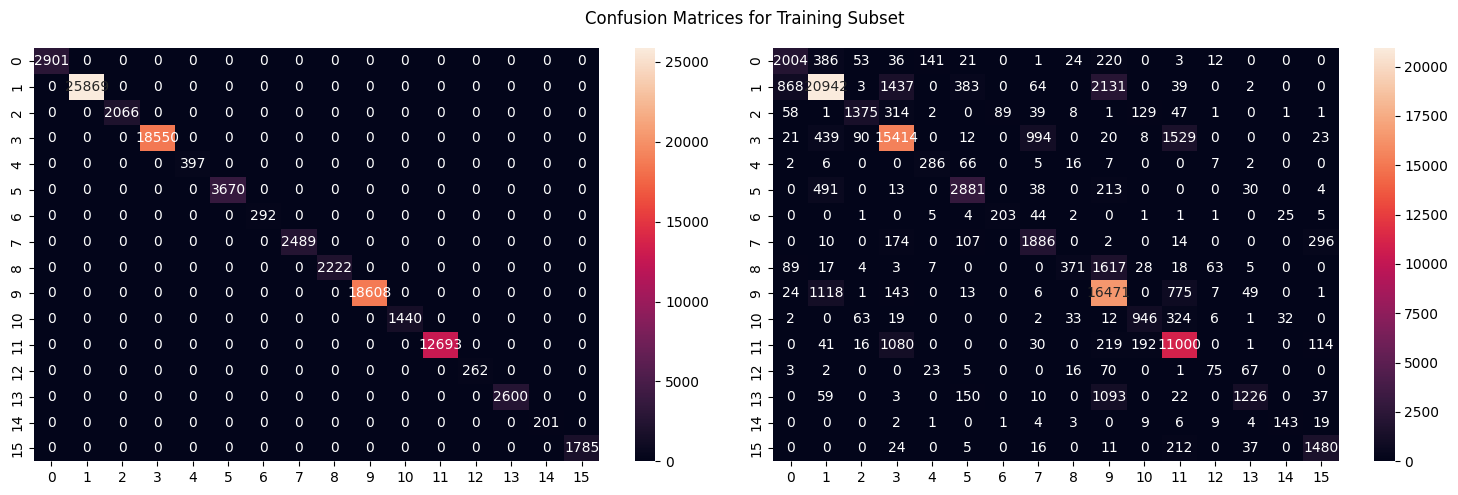

In [45]:
fig,axs=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_t,pred_t),annot=True,fmt='d',ax=axs[0])
ax[0].set_title('Confusion Matrix for Random Forest Classifier')
sns.heatmap(confusion_matrix(y_t,pred1_t),annot=True,fmt='d',ax=axs[1])
ax[1].set_title('Confusion Matrix for AdaBoost Classifier')
plt.suptitle('Confusion Matrices for Training Subset')
plt.tight_layout()
plt.show()

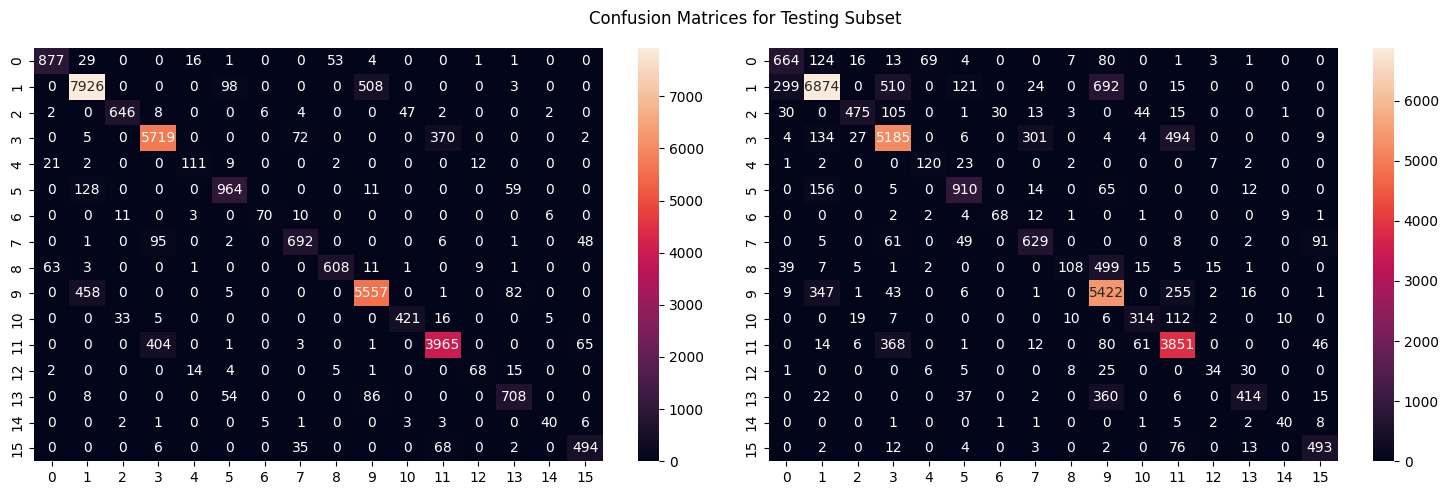

In [46]:
fig,axs=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_te,pred),annot=True,fmt='d',ax=axs[0])
ax[0].set_title('Confusion Matrix for Random Forest Classifier')
sns.heatmap(confusion_matrix(y_te,pred1),annot=True,fmt='d',ax=axs[1])
ax[1].set_title('Confusion Matrix for AdaBoost Classifier')
plt.suptitle('Confusion Matrices for Testing Subset')
plt.tight_layout()
plt.show()

In [ ]:
print('Random Forest Classifier Accuracy: 'accuracy_score(y_te,pred),'\n